## NYC Homeless Population Analysis

##### *How has the number of homeless individuals in NYC changed over 2009 to 2012 in different areas?*

###### **Name:** Sayyed Rahman 
###### **Student ID:** 100919085

## Introduction 


 Homelessness is one of the most common things you see in New York city. It is a big issue in the United States but especially in New York. You see homelessness everywhere in New York City, In the Bronx, Brooklyn Queens, Manhattan and even in the Subways.Understanding how the number of homeless individuals has changed over time and across different areas is crucial for evaluating the effectiveness of interventions and identifying trends.

 The dataset used for this analysis was sourced from the NYC Open Data portal, which provides publicly accessible data on various aspects of life in New York City. Specifically, this dataset includes records detailing annual homeless estimates across different areas of the city. Key columns in the dataset are Year, Area, and Homeless Estimates, providing the necessary information to analyze temporal and spatial trends.

This question was chosen because homelessness is a dynamic issue influenced by economic conditions, housing policies, and social support systems. By analyzing changes in homeless estimates, we can explore whether certain areas have seen sustained improvements or worsening trends over the years. Furthermore, the data provides an opportunity to investigate the impact of policy interventions or significant events, such as economic downturns or public health crises, on homelessness rates.

This analysis is particularly relevant as homelessness continues to dominate discussions on social equity and urban development. The findings can help identify areas that require more support and guide policymakers in allocating resources effectively. 

![Homelessness NYC](https://pavementpieces.com/wp-content/uploads/2019/01/46025722405_d6b62c27c8_z.jpg)
###### *Image Source: https://pavementpieces.com/as-temps-drop-nycs-homeless-face-chilling-crisis/*

# Methods

### Data Collection

In [1]:
import numpy as np
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://data.cityofnewyork.us/api/views/5t4n-d72c/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)#load data

### Clean Data

*I didn't really have to clean that much. most of it was already orginazed but I did sperate the data by year to help clear it out a bit more*

In [3]:
#cleaning 
data_2009 = data[data["Year"] == 2009]
data_2010 = data[data["Year"] == 2010]
data_2011 = data[data["Year"] == 2011]
data_2012 = data[data["Year"] == 2012]


# Analyses

*I will look though the relationships between the Years, Area and Homeless Estimates. to analyses the relationships is good to have graphs to help organize the data.*

## Distribution

*I will begian with the distribution of the homeless Estimates. I uesd a Histogram. As we see at most there is going to be around 3000+ homeless people in an area of NYC in the year 2009 to 2012*

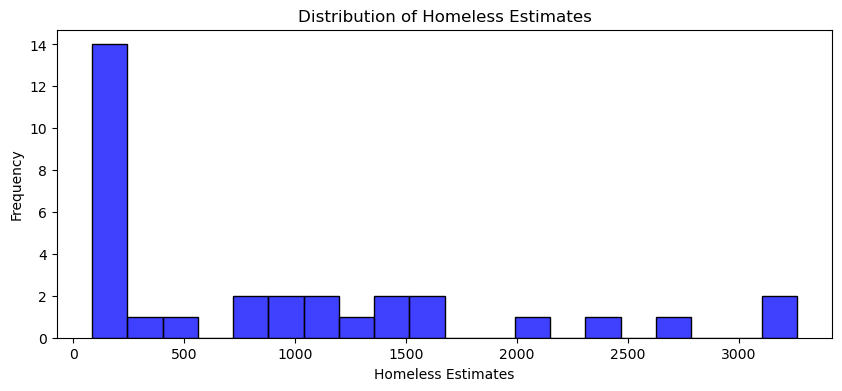

In [4]:
# Create a histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Homeless Estimates', bins=20, color='blue')
plt.title('Distribution of Homeless Estimates')
plt.xlabel('Homeless Estimates')
plt.ylabel('Frequency')
plt.show()

*it hard to see so I desided to split the areas, to see the homeless population between the years 2009 to 2012 in each ares. As we can see most have large gaps in between. with a huge spit in numbers.*

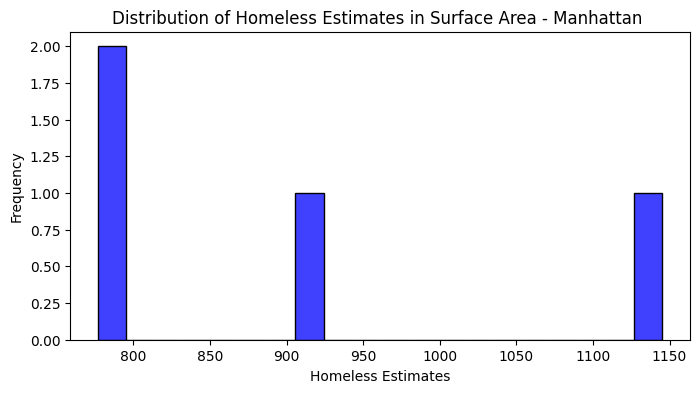

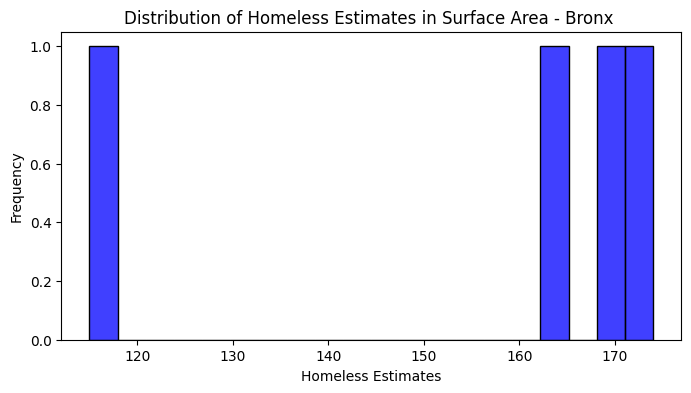

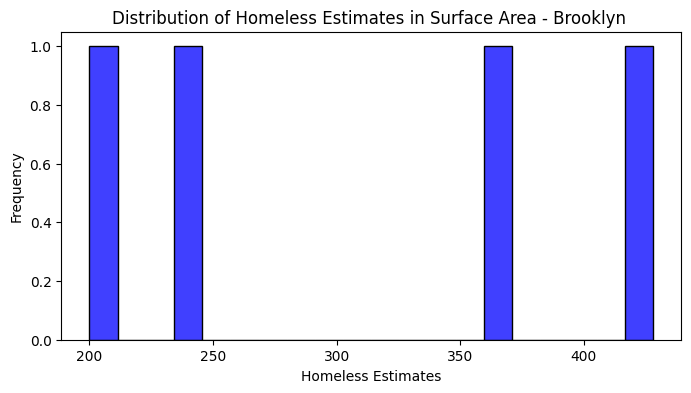

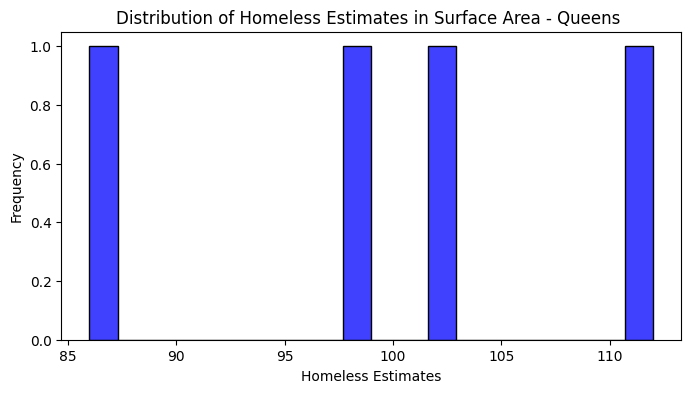

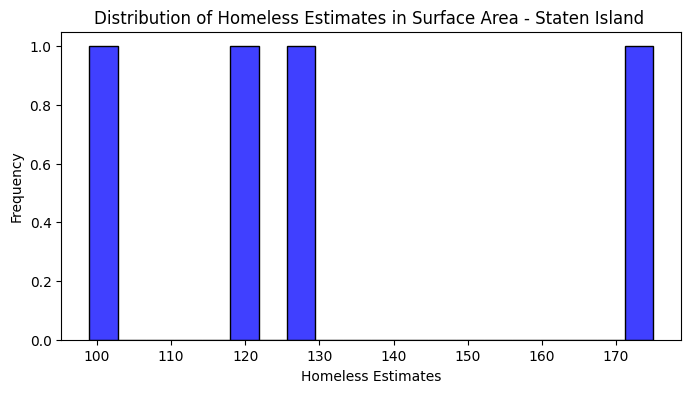

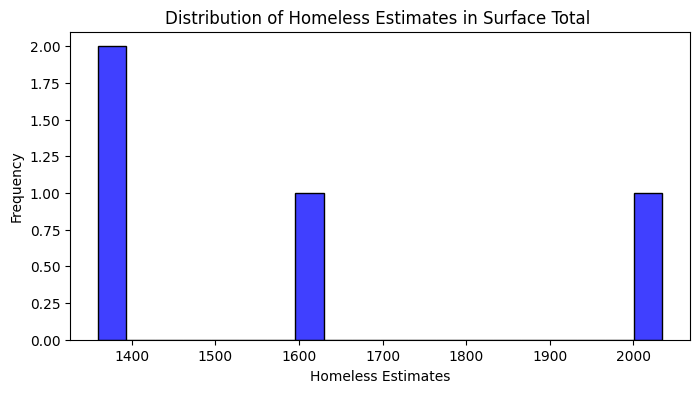

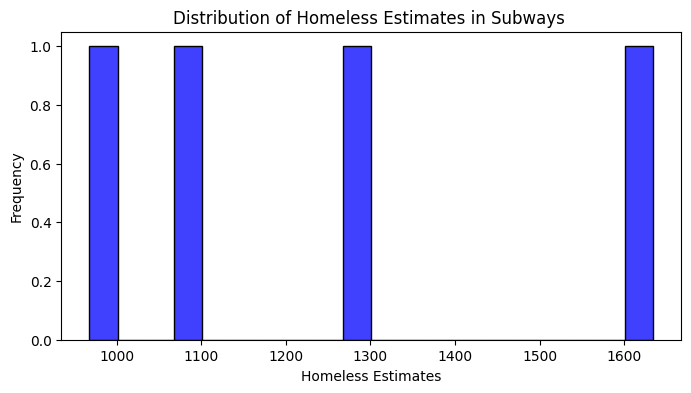

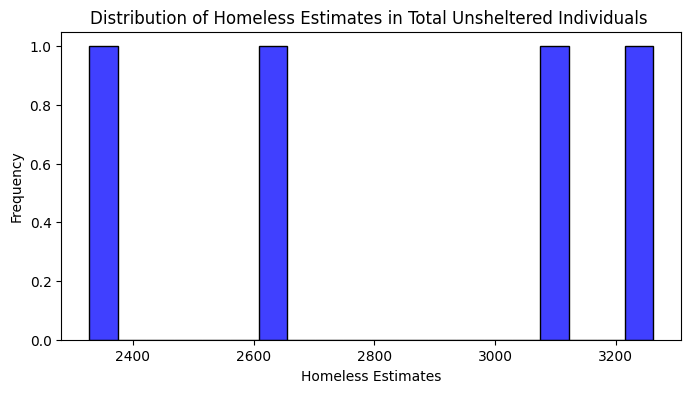

In [33]:
# List of unique areas
areas = data['Area'].unique()
# Generate a histogram for each area
for area in areas:#had some help with chatgbt for this
    plt.figure(figsize=(8, 4))
    # Filter data for the current area
    area_data = data[data['Area'] == area]
    # Plot histogram
    sns.histplot(data=area_data, x='Homeless Estimates', bins=20, color='blue')
    plt.title(f'Distribution of Homeless Estimates in {area}')
    plt.xlabel('Homeless Estimates')
    plt.ylabel('Frequency')
    plt.show()

### Year and Homelessness

*Now I'm comparing the total amount of homeless people to each year. As you can see from the line graph, there is a massive increase in homeless people, around 2000+ homeless people from 2009 to 2010. There was a decrease of more than 1000 homeless people in 2011, but it went up again the following year, back to 8000 homeless people.* 

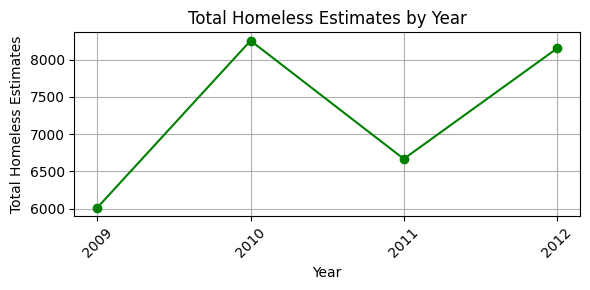

In [26]:
yearly_totals = data.groupby('Year')['Homeless Estimates'].sum()
plt.figure(figsize=(6, 3))
plt.plot(yearly_totals.index, yearly_totals.values, marker='o', color='green')
plt.title('Total Homeless Estimates by Year')
plt.xlabel('Year')
plt.ylabel('Total Homeless Estimates')
plt.grid(True)
plt.xticks(yearly_totals.index, rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()
plt.show()

### Mean, mix and max
*The analysis of the total homeless estimates over the years reveals some key details. The mean number of total homeless individuals per year is approximately 7273.25, reflecting an average level of homelessness in the analyzed areas. The minimum total represents the lowest observed homelessness count in a year is at 6016, indicating a potential year of improved conditions. The maximum value reached 8256, highlighting a year with the most significant homelessness challenges. These details provide a understanding of the overall trend and variability in homelessness over time, offering valuable insights into periods of crisis or improvement.*

In [22]:
mean = yearly_totals.mean()
minimum = yearly_totals.min()
maximum = yearly_totals.max()
print(f"Mean Total Homeless Estimates: {mean}")
print(f"Minimum Total Homeless Estimates: {minimum}")
print(f"Maximum Total Homeless Estimates: {maximum}")

Mean Total Homeless Estimates: 7273.25
Minimum Total Homeless Estimates: 6016
Maximum Total Homeless Estimates: 8256


### Homelessness in Subways 
*The data on homelessness in the subway reveals insightful patterns about the homeless population. Over the years, the subway has consistently been a significant location for homeless individuals, reflecting both the challenges and the visibility of homelessness in public spaces. This data highlights the importance of targeted interventions in public transit systems, which often serve as temporary shelters for individuals without homes. Understanding these patterns can help policymakers allocate resources to support both the homeless population and the broader community that relies on public transit. I want to seperate subway from everything else because one of the most commen sterutype is that NYC subways have a lot of homeless people and while there maybe some turth, there are also a lot more places that have homelessness in*

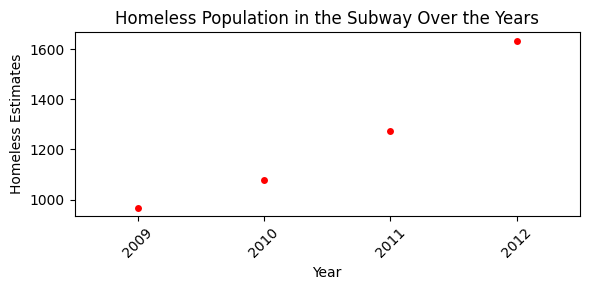

In [38]:
# Filter data for Subway
subway_data = data[data['Area'].str.contains('Subway', case=False, na=False)]
# Check if there's data for the subway
if not subway_data.empty:
    plt.figure(figsize=(6, 3))
    sns.swarmplot(data=subway_data, x='Year', y='Homeless Estimates', color='red')
    plt.title('Homeless Population in the Subway Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Homeless Estimates')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the subway.")

## Homelessness everywhere else 
*The scatter plot for homeless estimates across all areas, excluding the subway, provides a detailed view of how homelessness is distributed and varies over the years in different locations. The data shows distinct clusters for certain areas, indicating consistent trends, while other areas display sporadic or fluctuating patterns. Some areas stand out with higher homelessness estimates, which may highlight locations facing more significant socioeconomic challenges or larger homeless populations. The differentiation between areas also suggests the influence of local factors, such as policy effectiveness, shelter availability, and community resources. By excluding subway data, this scatter plot emphasizes the diversity of homelessness across different parts of the city, offering insights into where tailored interventions might be most effective.*

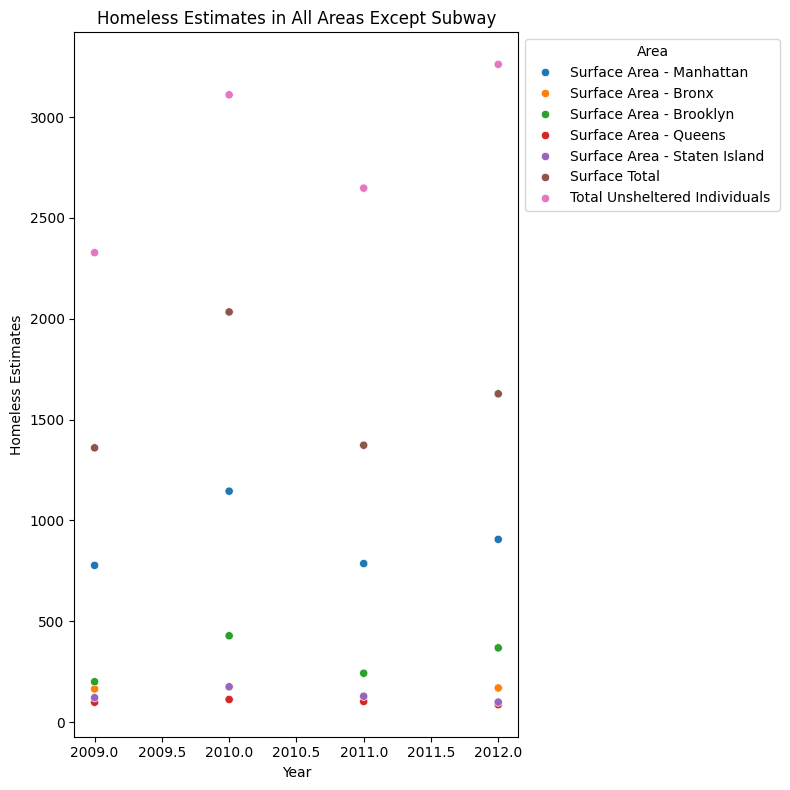

In [37]:
# Filter out the subway data
non_subway_data = data[~data['Area'].str.contains('Subway', case=False, na=False)]
# Create a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=non_subway_data, x='Year', y='Homeless Estimates', hue='Area', palette='tab10')
plt.title('Homeless Estimates in All Areas Except Subway')
plt.xlabel('Year')
plt.ylabel('Homeless Estimates')
plt.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Discussion

*In conclusion the data on homelessness gives several important insights. The analysis revealed the overall trends in homelessness over the 4 years, showing fluctuations in total homeless estimates. Key statistics, including the mean, minimum, and maximum yearly totals, provided a foundation for understanding the scale and variability of the issue. A deeper dive into the subway-specific data highlighted its role as a critical area for homelessness, emphasizing the unique challenges faced in public spaces. These findings underscore the need for data-driven policy decisions to address homelessness effectively, targeting areas with the greatest need while monitoring changes over time. By analyzing these trends, we are given a clearer understanding of where efforts may yield the most impact and how homelessness evolves in response to popular conditions.*

## References
1. Source data - https://catalog.data.gov/dataset/directory-of-homeless-population-by-year
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz 
5. used some Chatgbt to help with the code and word out my thoughts